In [844]:
import requests
import pandas as pd
import numpy as np

# Collect match results data

### Create dictionary with data to retrieve information about match results

In [564]:
match_data = {
    2020: {
        11: {"url": "https://ekstraliga.pl/se/mecz/1204", "Location": "Away"},
        13: {"url": "https://ekstraliga.pl/se/mecz/2067", "Location": "Home"},
        14: {"url": "https://ekstraliga.pl/se/mecz/1216", "Location": "Away"}
    },
    2022: {
        1: {"url": "https://ekstraliga.pl/se/mecz/2881", "Location": "Away"},
        2: {"url": "https://ekstraliga.pl/se/mecz/2883", "Location": "Home"},
        3: {"url": "https://ekstraliga.pl/se/mecz/2887", "Location": "Away"},
        4: {"url": "https://ekstraliga.pl/se/mecz/2891", "Location": "Home"},
        5: {"url": "https://ekstraliga.pl/se/mecz/2897", "Location": "Home"},
        6: {"url": "https://ekstraliga.pl/se/mecz/2899", "Location": "Away"},
        7: {"url": "https://ekstraliga.pl/se/mecz/2906", "Location": "Home"},
        8: {"url": "https://ekstraliga.pl/se/mecz/2908", "Location": "Away"},
        11: {"url": "https://ekstraliga.pl/se/mecz/3598", "Location": "Away"},
        14: {"url": "https://ekstraliga.pl/se/mecz/2932", "Location": "Home"}
    },
    2023: {
        1: {"url": "https://ekstraliga.pl/se/mecz/3816", "Location": "Home"},
        2: {"url": "https://ekstraliga.pl/se/mecz/4345", "Location": "Away"},
        3: {"url": "https://ekstraliga.pl/se/mecz/3826", "Location": "Home"},
        4: {"url": "https://ekstraliga.pl/se/mecz/3831", "Location": "Away"},
        7: {"url": "https://ekstraliga.pl/se/mecz/3841", "Location": "Away"},
        8: {"url": "https://ekstraliga.pl/se/mecz/3844", "Location": "Home"},
        9: {"url": "https://ekstraliga.pl/se/mecz/3848", "Location": "Away"},
        10: {"url": "https://ekstraliga.pl/se/mecz/3855", "Location": "Home"},
        11: {"url": "https://ekstraliga.pl/se/mecz/3859", "Location": "Home"},
        12: {"url": "https://ekstraliga.pl/se/mecz/3860", "Location": "Away"},
        13: {"url": "https://ekstraliga.pl/se/mecz/3867", "Location": "Home"},
        14: {"url": "https://ekstraliga.pl/se/mecz/3869", "Location": "Away"}
    },
    2024: {
        1: {"url": "https://ekstraliga.pl/se/mecz/4807", "Location": "Home"},
        2: {"url": "https://ekstraliga.pl/se/mecz/4811", "Location": "Away"},
        3: {"url": "https://ekstraliga.pl/se/mecz/4813", "Location": "Home"},
        4: {"url": "https://ekstraliga.pl/se/mecz/4816", "Location": "Away"},
        6: {"url": "https://ekstraliga.pl/se/mecz/4826", "Location": "Home"},
        7: {"url": "https://ekstraliga.pl/se/mecz/4828", "Location": "Away"},
        8: {"url": "https://ekstraliga.pl/se/mecz/4832", "Location": "Away"},
        9: {"url": "https://ekstraliga.pl/se/mecz/4836", "Location": "Home"},
        10: {"url": "https://ekstraliga.pl/se/mecz/4840", "Location": "Home"},
        11: {"url": "https://ekstraliga.pl/se/mecz/4846", "Location": "Away"},
        12: {"url": "https://ekstraliga.pl/se/mecz/4848", "Location": "Home"}
    }
}


### Get data about matches

In [565]:
frames = []
for season, rounds in match_data.items():
    for round_key, round_data in rounds.items():
        url = round_data["url"]
        response = requests.get(url)

        if response.status_code == 200:
            tables = pd.read_html(response.text)
            table_index = 1 if round_data["Location"] == "Away" else 0
            df = tables[table_index]

            df.insert(0,"Season",season)
            df.insert(1,"Round",round_key)
            df.insert(2,"Location",round_data["Location"])
            
            frames.append(df)
        else:
            print(f"Failed to retrieve the page. Status code: {response.status_code}")
df = pd.concat(frames,ignore_index=True)

In [566]:
df

,Season,Round,Location,#,Zawodnik,1,2,3,4,5,S,B,6,7
0,2020,11,Away,1.0,Nicki Pedersen,3.0,2,2.0,2,2,11.0,NaN,NaN,NaN
1,2020,11,Away,2.0,Krystian Pieszczek,0.0,0,0.0,2,NaN,2.0,NaN,NaN,NaN
2,2020,11,Away,3.0,Kenneth Bjerre,1.0,1,0.0,1,2,5.0,NaN,NaN,NaN
3,2020,11,Away,4.0,Przemysław Pawlicki,1.0,D,2.0,T,1',4.0,1.0,NaN,NaN
4,2020,11,Away,5.0,Artem Laguta,3.0,2,2.0,0,0,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2024,12,Home,12.0,Kacper Pludra,0.0,-,-,-,NaN,0.0,NaN,NaN,NaN
284,2024,12,Home,13.0,Vadim Tarasenko,2.0,0,3,3,2',10.0,1.0,0.0,NaN
285,2024,12,Home,14.0,Kacper Łobodziński,1.0,2,0,NaN,NaN,3.0,NaN,NaN,NaN
286,2024,12,Home,15.0,Kevin Małkiewicz,0.0,2,0,1,NaN,3.0,NaN,NaN,NaN


In [567]:
df_kl = df.loc[df["Zawodnik"] == "Kacper Łobodziński"]

In [568]:
df_kl.head(5)

,Season,Round,Location,#,Zawodnik,1,2,3,4,5,S,B,6,7
5,2020,11,Away,6.0,Kacper Łobodziński,1.0,0,0.0,0,NaN,1.0,NaN,NaN,NaN
13,2020,13,Home,14.0,Kacper Łobodziński,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN
22,2020,14,Away,7.0,Kacper Łobodziński,0,0,U,NaN,NaN,0.0,NaN,NaN,NaN
30,2022,1,Away,7.0,Kacper Łobodziński,1,0,1',NaN,NaN,2.0,1.0,NaN,NaN
37,2022,2,Home,14.0,Kacper Łobodziński,2',0,0,NaN,NaN,2.0,1.0,NaN,NaN


In [569]:
df_kl_total = df_kl.loc[:,["Season","Round","Location","Zawodnik","S"]].reset_index(drop=True)

In [570]:
df_kl_total.rename(columns={"S":"Total_points"}, inplace=True)

In [571]:
df_kl_total.head(5)

,Season,Round,Location,Zawodnik,Total_points
0,2020,11,Away,Kacper Łobodziński,1.0
1,2020,13,Home,Kacper Łobodziński,0.0
2,2020,14,Away,Kacper Łobodziński,0.0
3,2022,1,Away,Kacper Łobodziński,2.0
4,2022,2,Home,Kacper Łobodziński,2.0


In [572]:
df_kl_total.insert(2,
                   "Season_Round",
                   df_kl_total["Season"].astype(str) + ' ' + df_kl_total["Round"].astype(str)
                   )

In [573]:
df_kl_total.head()

,Season,Round,Season_Round,Location,Zawodnik,Total_points
0,2020,11,2020 11,Away,Kacper Łobodziński,1.0
1,2020,13,2020 13,Home,Kacper Łobodziński,0.0
2,2020,14,2020 14,Away,Kacper Łobodziński,0.0
3,2022,1,2022 1,Away,Kacper Łobodziński,2.0
4,2022,2,2022 2,Home,Kacper Łobodziński,2.0


In [574]:
df_kl_total_multi_ind = df_kl_total.set_index(["Season", "Round"])

In [575]:
df_kl_total_multi_ind

Season_Round Location            Zawodnik  Total_points
Season Round                                                        
2020   11         2020 11     Away  Kacper Łobodziński           1.0
       13         2020 13     Home  Kacper Łobodziński           0.0
       14         2020 14     Away  Kacper Łobodziński           0.0
2022   1           2022 1     Away  Kacper Łobodziński           2.0
       2           2022 2     Home  Kacper Łobodziński           2.0
       3           2022 3     Away  Kacper Łobodziński           0.0
       4           2022 4     Home  Kacper Łobodziński           3.0
       5           2022 5     Home  Kacper Łobodziński           2.0
       6           2022 6     Away  Kacper Łobodziński           0.0
       7           2022 7     Home  Kacper Łobodziński           3.0
       8           2022 8     Away  Kacper Łobodziński           2.0
       11         2022 11     Away  Kacper Łobodziński           2.0
       14         2022 14     Home  Kacper Łobodziński           1.0
2023   1           2023 1     Home  Kacper Łobodziński           0.0
       2           2023 2     Away  Kacper Łobodziński           0.0
       3           2023 3     Home  Kacper Łobodziński           2.0
       4           2023 4     Away  Kacper Łobodziński           0.0
       7           2023 7     Away  Kacper Łobodziński           3.0
       8           2023 8     Home  Kacper Łobodziński           3.0
       9           2023 9     Away  Kacper Łobodziński           0.0
       10         2023 10     Home  Kacper Łobodziński           7.0
       11         2023 11     Home  Kacper Łobodziński           5.0
       12         2023 12     Away  Kacper Łobodziński           1.0
       13         2023 13     Home  Kacper Łobodziński           1.0
       14         2023 14     Away  Kacper Łobodziński           1.0
2024   1           2024 1     Home  Kacper Łobodziński           4.0
       2           2024 2     Away  Kacper Łobodziński           1.0
       6           2024 6     Home  Kacper Łobodziński           7.0
       7           2024 7     Away  Kacper Łobodziński           7.0
       8           2024 8     Away  Kacper Łobodziński           5.0
       9           2024 9     Home  Kacper Łobodziński           4.0
       10         2024 10     Home  Kacper Łobodziński           8.0
       11         2024 11     Away  Kacper Łobodziński           1.0
       12         2024 12     Home  Kacper Łobodziński           3.0

In [576]:
df_kl_avg_pts = (
    df_kl_total
    .groupby("Season")[["Total_points"]]
    .mean()
    .round(2)
    .rename(columns={"Total_points":"Average_pts"})
    .reset_index()
)

In [577]:
df_kl_avg_pts

,Season,Average_pts
0,2020,0.33
1,2022,1.70
2,2023,1.92
3,2024,4.44


# Collect history and details statistics od Kacper Łobodziński

In [578]:
rider_data = {2020: {"url": "https://ekstraliga.pl/se/zawodnicy/1304/2020/pgee"},
              2022: {"url": "https://ekstraliga.pl/se/zawodnicy/1304/2022/pgee"},
              2023: {"url": "https://ekstraliga.pl/se/zawodnicy/1304/2023/pgee"},
              2024: {"url": "https://ekstraliga.pl/se/zawodnicy/1304/2024/pgee"}}

In [579]:
url = "https://ekstraliga.pl/se/zawodnicy/1304/2024/pgee"
response = requests.get(url)
if response.status_code == 200:
    tables = pd.read_html(response.text)
    df_history = tables[0]
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

In [580]:
details = []
for season_key, season_value in rider_data.items():
    for url_key, url_value in season_value.items():
        url = url_value
        response = requests.get(url)
        if response.status_code == 200:

            tables = pd.read_html(response.text)            
            df_details = tables[1]
            df_details.insert(0,"Season",season_key)
            details.append(df_details)
        else:
            print(f"Failed to retrieve the page. Status code: {response.status_code}")

df_details = pd.concat(details,ignore_index=True)

In [581]:
df_history

,Sezon,Drużyna,ŚBP,Starty,Pozycja
0,2024.0,GRU,1.421,38.0,35/53
1,2023.0,GRU,1.000,29.0,45/54
2,2022.0,GRU,0.778,27.0,51/63
3,2020.0,GRU,0.100,10.0,/53
4,NaN,NaN,NaN,NaN,NaN


In [582]:
df_history = df_history.dropna(how="all")

In [583]:
df_history

,Sezon,Drużyna,ŚBP,Starty,Pozycja
0,2024.0,GRU,1.421,38.0,35/53
1,2023.0,GRU,1.000,29.0,45/54
2,2022.0,GRU,0.778,27.0,51/63
3,2020.0,GRU,0.100,10.0,/53


In [584]:
df_history.dtypes

Sezon      float64
Drużyna     object
ŚBP        float64
Starty     float64
Pozycja     object
dtype: object

In [585]:
df_details.rename(columns={"Unnamed: 0":"Stat_factor"}, inplace=True)

In [586]:
df_details.head(5)

,Season,Stat_factor,Ogółem,Dom,Wyjazd
0,2020,Średnia biegopunktowa,0.100,0.000,0.143
1,2020,Mecze,3,1,2
2,2020,Starty,10,3,7
3,2020,Punkty,1,0,1
4,2020,Bonusy,0,0,0


In [587]:
df_details["Stat_factor"].unique()

array(['Średnia biegopunktowa', 'Mecze', 'Starty', 'Punkty', 'Bonusy',
       'I miejsca', 'II miejsca', 'III miejsca', 'IV miejsca',
       'Udział w 14 biegach', 'Udział w 15 biegach', 'Defekty', 'Taśmy',
       'Wykluczenia za 2 minuty', 'Wykluczenia', 'Upadki', 'Żółte kartki',
       'Czerwone kartki', 'Ostrzeżenia', nan], dtype=object)

In [588]:
filter_values = ["I miejsca", "II miejsca", "III miejsca","IV miejsca"]
df_places = df_details[df_details["Stat_factor"].isin(filter_values)].reset_index(drop=True)

In [589]:
df_places

,Season,Stat_factor,Ogółem,Dom,Wyjazd
0,2020,I miejsca,0,0,0
1,2020,II miejsca,0,0,0
2,2020,III miejsca,1,0,1
3,2020,IV miejsca,8,3,5
4,2022,I miejsca,2,2,0
5,2022,II miejsca,3,1,2
6,2022,III miejsca,5,3,2
7,2022,IV miejsca,17,8,9
8,2023,I miejsca,3,3,0
9,2023,II miejsca,4,3,1


In [590]:
df_places_overall = df_places.loc[:,["Season","Stat_factor","Ogółem"]]

In [591]:
df_places_overall.rename(columns={"Stat_factor":"Place","Ogółem":"Place_quantity"}, inplace=True)

In [592]:
df_places_overall

,Season,Place,Place_quantity
0,2020,I miejsca,0
1,2020,II miejsca,0
2,2020,III miejsca,1
3,2020,IV miejsca,8
4,2022,I miejsca,2
5,2022,II miejsca,3
6,2022,III miejsca,5
7,2022,IV miejsca,17
8,2023,I miejsca,3
9,2023,II miejsca,4


In [593]:
df_places_overall["Place_quantity"] = df_places_overall["Place_quantity"].astype("int32")

In [594]:
df_places_overall.dtypes

Season             int64
Place             object
Place_quantity     int32
dtype: object

In [595]:
df_kl_total_multi_ind.index.get_level_values(level=1)

Int64Index([11, 13, 14,  1,  2,  3,  4,  5,  6,  7,  8, 11, 14,  1,  2,  3,  4,
             7,  8,  9, 10, 11, 12, 13, 14,  1,  2,  6,  7,  8,  9, 10, 11,
            12],
           dtype='int64', name='Round')

In [842]:
df_kl_total_points = df_kl_total_multi_ind[["Total_points"]]

Added font: 3_of_9_Barcode.ttf
Added font: DMSansRegular.ttf
Added font: Galibier-Regular.ttf
Added font: Helvetica.ttf
Added font: Karla-Bold.ttf
Added font: Karla-ExtraBold.ttf
Added font: KarlaLight.ttf
Added font: KarlaRegular.ttf
Added font: OpenSans-Light.ttf
Added font: OpenSans-Regular.ttf


C:\Users\Paweł\AppData\Local\Temp\ipykernel_9960\1972417039.py:392: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.8, w_pad=3.8, h_pad=3.0)


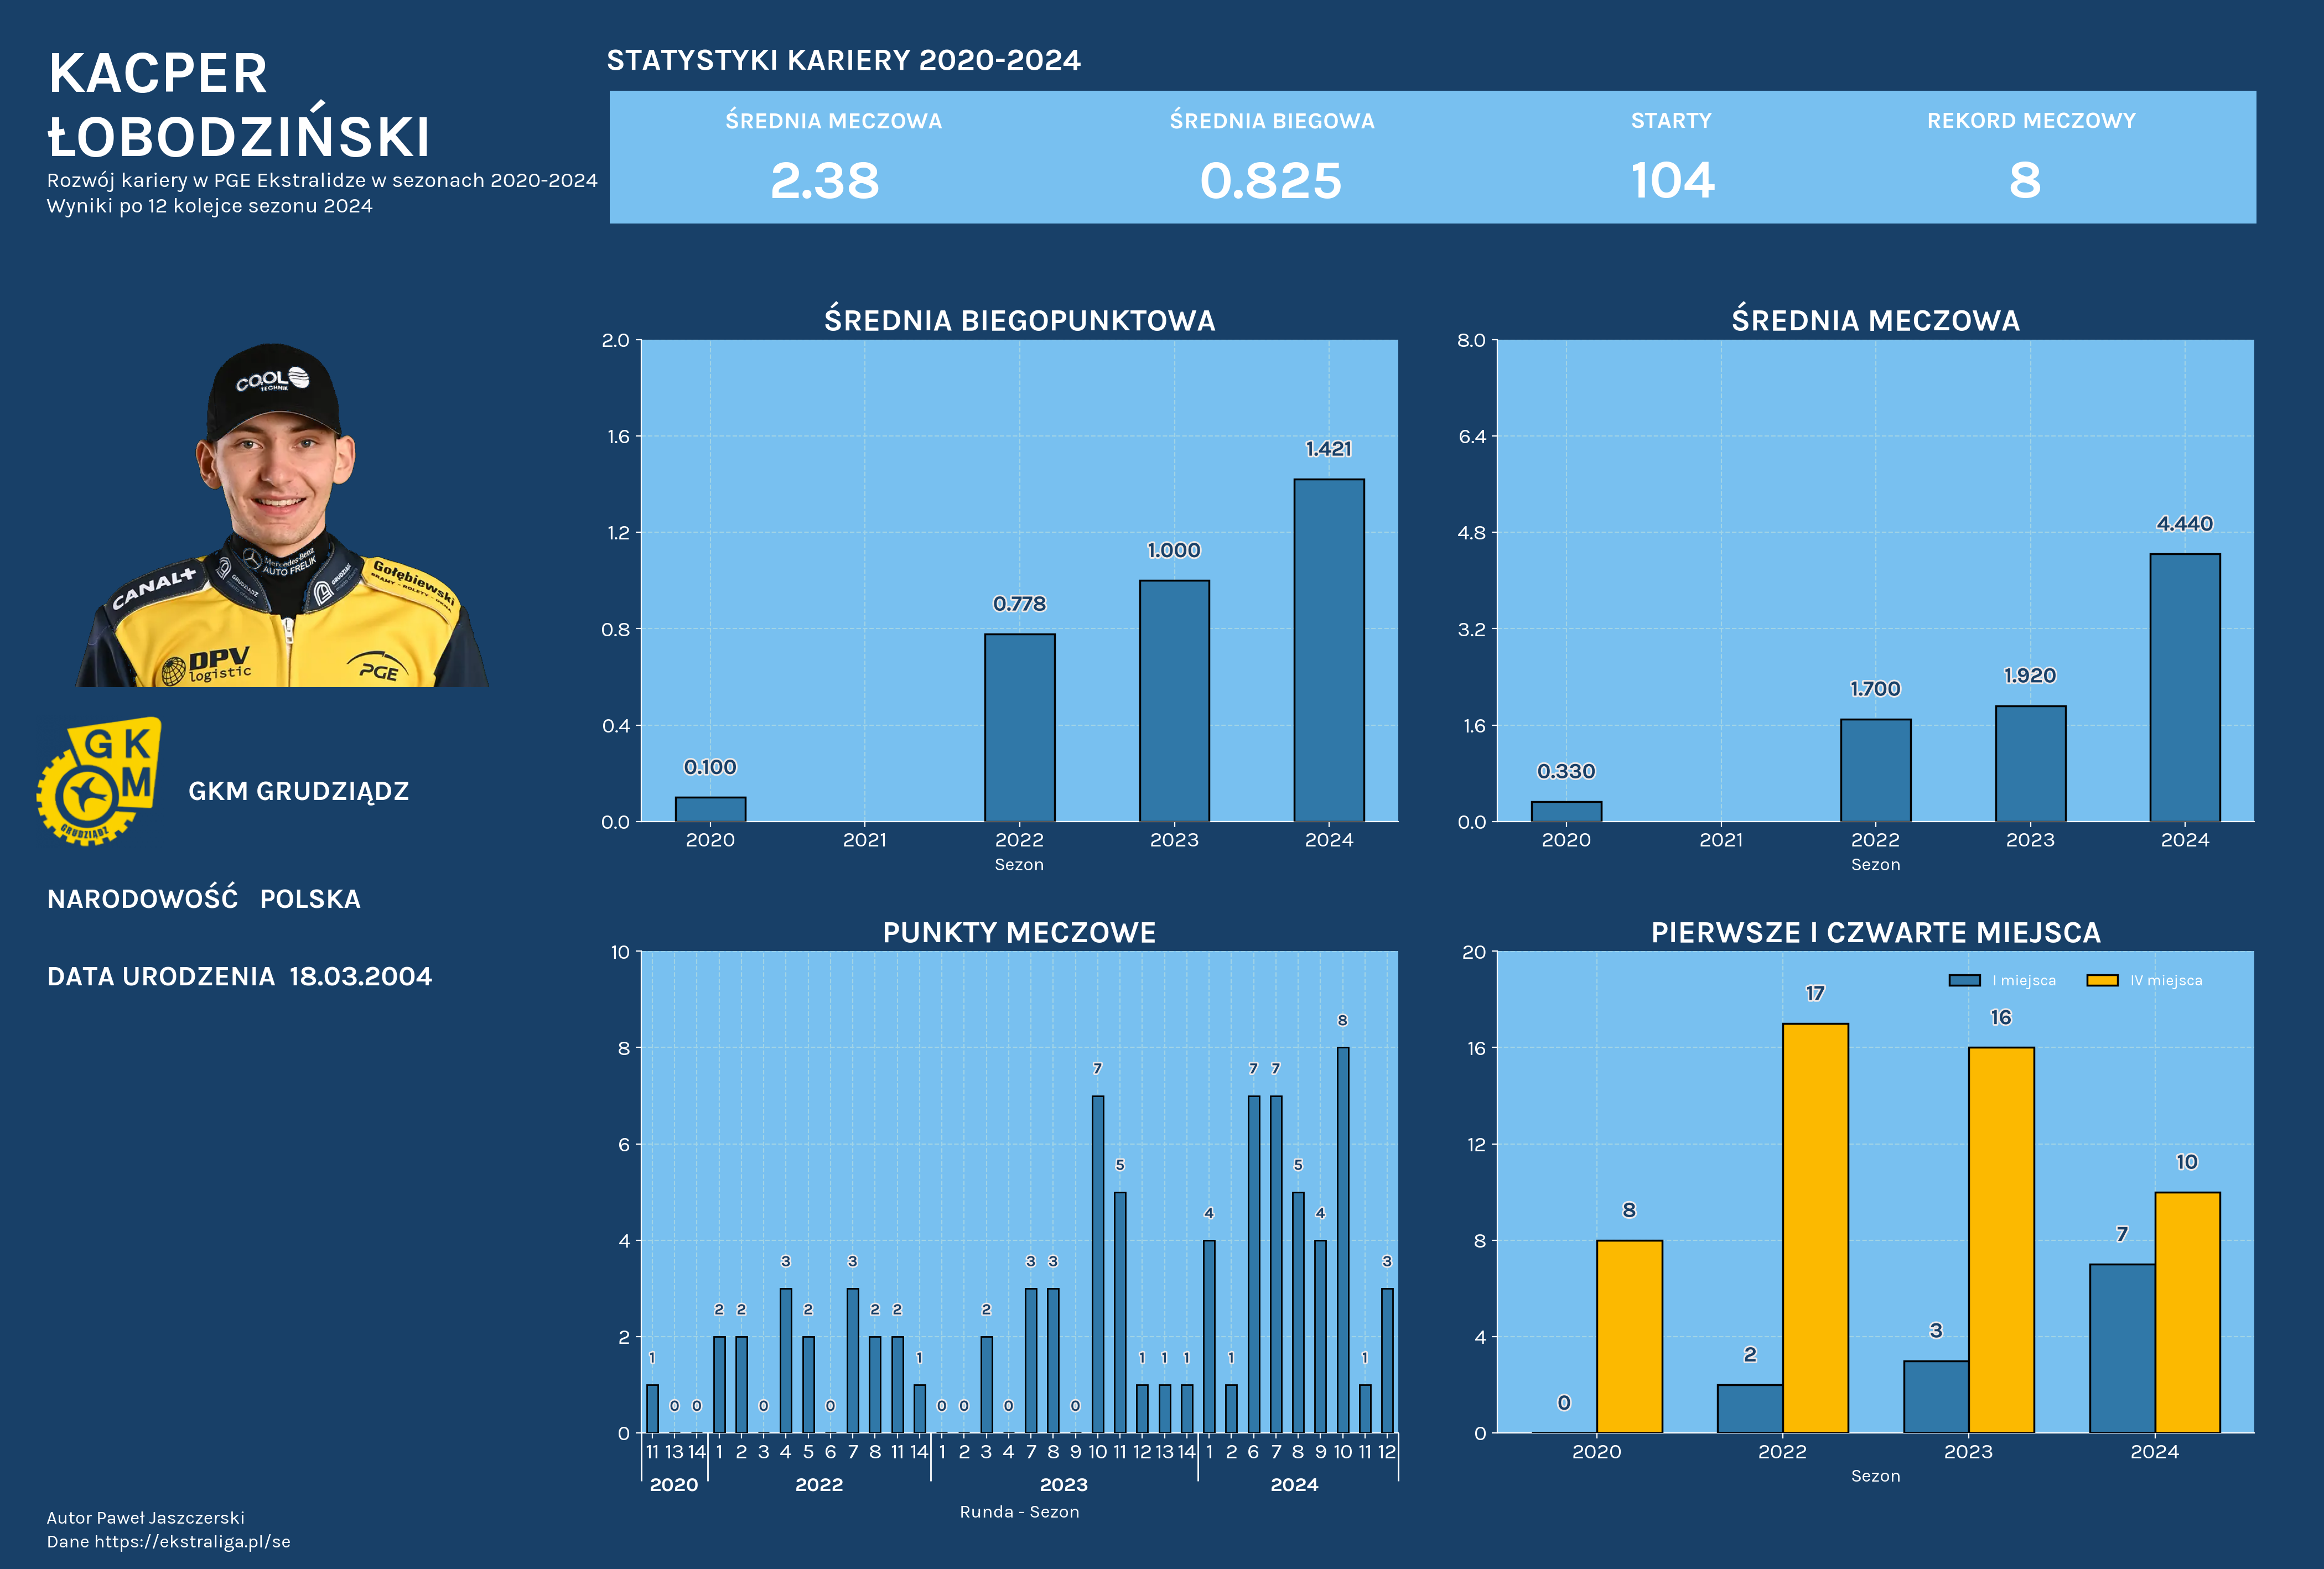

In [845]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
import numpy as np

from PIL import Image
import urllib
import os


# Add pretty fonts

font_path = "C:/Users/Paweł/AppData/Local/Microsoft/Windows/Fonts"  # Set the path to where the fonts are located

for file_name in os.listdir(font_path):
    if file_name.endswith(".ttf"):
        full_path = os.path.join(font_path, file_name)
        try:
            fm.fontManager.addfont(full_path)
            print(f"Added font: {file_name}")
        except Exception as e:
            print(f"Font {file_name} could not be added. Error: {e}")
            continue

# Set the font globally
rcParams['font.family'] = 'Karla'

# Load the KarlaRegular font
karla_regular = fm.FontProperties(fname=os.path.join(font_path, 'KarlaRegular.ttf'))
karla_bold = fm.FontProperties(fname=os.path.join(font_path, 'Karla-Bold.ttf'))
karla_extrabold = fm.FontProperties(fname=os.path.join(font_path, 'Karla-ExtraBold.ttf'))

# Set global grid line style and color
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = "#A0D3E6FF"
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['hatch.linewidth'] = .35
plt.rcParams['hatch.color'] = '#E34602'


# Data
y_sbp = df_history["ŚBP"]
y_ap = df_kl_avg_pts["Average_pts"]
y_tp = df_kl_total["Total_points"]
y_first_place = df_places_overall[df_places_overall["Place"] == "I miejsca"]["Place_quantity"]
y_fourth_place = df_places_overall[df_places_overall["Place"] == "IV miejsca"]["Place_quantity"]
x_places =  df_places_overall[df_places_overall["Place"] == "I miejsca"]["Season"]



# Create a 2x2 grid of subplots with each subplot having the same size
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor="#184068FF", dpi=200)  


# Adjust figure properties

for ax in axs.flat:
    ax.set_facecolor("#78C0F0FF")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(color="#A0D3E6FF")
    ax.tick_params(axis='x', colors="white", labelsize=14)
    ax.tick_params(axis="y", colors="white", labelsize=14)

width = 0.45

# Create a FontProperties object specifically for the title
title_fontproperties = fm.FontProperties(fname=os.path.join(font_path, 'Karla-Bold.ttf'), size=20)

# Create a FontProperties object specifically for the xlabel
xlabel_fontproperties = fm.FontProperties(fname=os.path.join(font_path, 'KarlaRegular.ttf'), size=12)

# First subplot
axs[0, 0].bar(df_history['Sezon'], y_sbp, ec="black", lw=1.25,
              color="#3078A8FF", zorder=3, width=width)
axs[0, 0].set_ylim(0,2)
axs[0, 0].set_title('ŚREDNIA BIEGOPUNKTOWA', color="white", fontproperties=title_fontproperties)
axs[0, 0].set_xlabel('Sezon', fontproperties=xlabel_fontproperties)
axs[0, 0].yaxis.set_major_locator(ticker.MultipleLocator(0.4))

# Annotation for first subplot
for season, y_value in zip(df_history["Sezon"], y_sbp):
    text_1 = axs[0, 0].annotate(text=f"{y_value:.3f}", xy=(season, y_value),
                       xytext=(0,12),textcoords="offset points", size=14,weight="bold",
                       color="#184068FF",ha="center", va="bottom")
    text_1.set_path_effects([
        path_effects.Stroke(
            linewidth=2.2,
            foreground='#efe9e6'
        ),
        path_effects.Normal()
    ])

# Second subplot
axs[0, 1].bar(df_kl_avg_pts["Season"], y_ap, ec="black", lw=1.25, 
              color="#3078A8FF", zorder=3, width=width)
axs[0, 1].set_title('ŚREDNIA MECZOWA', fontproperties=title_fontproperties)
axs[0, 1].set_xlabel('Sezon', fontproperties=xlabel_fontproperties)
axs[0, 1].set_ylim(0,8)
axs[0, 1].yaxis.set_major_locator(ticker.MultipleLocator(1.6))

# Annotation for second subplot
for season, y_value in zip(df_kl_avg_pts["Season"], y_ap):
    text_2 = axs[0, 1].annotate(text=f"{y_value:.3f}", xy=(season, y_value),
                                xytext=(0,12), textcoords="offset points", size=14,
                                weight='bold', color="#184068FF", ha="center", va="bottom")
    text_2.set_path_effects([
        path_effects.Stroke(
            linewidth=2.2,
            foreground="#efe9e9"
        ),
        path_effects.Normal()
    ])



# Third subplot

ax3 = axs[1, 0]

# Ensure the MultiIndex levels are treated as categories
df_kl_total_points.index = df_kl_total_points.index.set_levels([df_kl_total_points.index.levels[0].astype(str), df_kl_total_points.index.levels[1].astype(str)])

# Plot the bar chart
bars_container = df_kl_total_points.plot(kind="bar", xlabel='', ax=ax3, color='#3078A8FF', edgecolor='black', linewidth=1, legend=False, zorder=3)
ax3.set_title('PUNKTY MECZOWE', fontproperties=title_fontproperties)
ax3.set_xlabel("Runda - Sezon", fontproperties=xlabel_fontproperties)
ax3.xaxis.set_label_coords(0.5, -0.15)

myticklabels = df_kl_total_points.index.get_level_values(level=1).tolist()
ax3.set_xticks(range(len(myticklabels)))
ax3.set_xticklabels(myticklabels, rotation=0)
ax3.set_ylim(0, 10)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(2))


pos = [-0.5]
for i in range(len(df_kl_total_points.index.unique(level=0))):
    pos.append((i + 1) * len(df_kl_total_points.index.unique('Round')) - 0.5)
ax3.vlines([-0.5,2.5,12.5,24.5,33.5], ymin=0, ymax=-1, color='white', lw=1, clip_on=False)

for ps0, ps1, ps2, lbl in zip(pos[:-1], pos[:], pos[1:], df_kl_total_points.index.unique('Season')):
    x_pos = (ps0 + ps1 + ps2) / 4.8
    if lbl == '2020':
        x_pos = 1 
    elif lbl == '2022':
        x_pos = 7.5
    elif lbl == '2023':
        x_pos = 18.5
    ax3.text(x_pos, -0.12, lbl, ha='center', clip_on=False, transform=ax3.get_xaxis_transform(), weight='bold', size=13)


# Annotate the bars for third subplot
for bar in bars_container.containers[0]:
    ax3.annotate(f'{bar.get_height():.0f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 12), textcoords='offset points', ha='center', va='bottom', size=10,
                 weight='bold', color="#184068FF").set_path_effects([
        path_effects.Stroke(linewidth=2, foreground="#efe9e9"),
        path_effects.Normal()
    ])


# Fourth subplot

# Define the positions for the bars
bar_width = 0.35
index = np.arange(len(y_first_place))

axs[1, 1].bar(index, y_first_place, bar_width, ec="black", lw=1.25,
              color='#3078A8FF', label="I miejsca", zorder=3)
axs[1, 1].bar(index + bar_width, y_fourth_place, bar_width, ec="black", lw=1.25,
              color="#fcb900", label="IV miejsca", zorder=3)
axs[1, 1].set_title('PIERWSZE I CZWARTE MIEJSCA', fontproperties=title_fontproperties)
axs[1, 1].set_xlabel('Sezon', fontproperties=xlabel_fontproperties)
axs[1, 1].set_xticks(index + bar_width / 2)
axs[1, 1].set_xticklabels(x_places)
axs[1, 1].set_ylim(0,20)
axs[1, 1].legend(
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.95,0.98),
    frameon = False
)
axs[1, 1].yaxis.set_major_locator(ticker.MultipleLocator(4))



# Annotation for fourth subplot I miejsca
for season, y_value in zip(index, y_first_place):
    text_4 = axs[1, 1].annotate(text=f"{y_value:.0f}", xy=(season, y_value),
                                xytext=(0,12), textcoords="offset points", size=14,
                                weight='bold',color="#184068FF", ha="center", va="bottom",
                                )
    text_4.set_path_effects([
        path_effects.Stroke(
            linewidth=2.2,
            foreground="#efe9e9"
        ),
        path_effects.Normal()
    ])


# Annotation for fourth subplot IV miejsca
for season, y_value in zip(index + bar_width, y_fourth_place):
    text_5 = axs[1, 1].annotate(text=f"{y_value:.0f}", xy=(season, y_value),
                                xytext=(0,12), textcoords="offset points", size=14,
                                weight='bold', color="#184068FF", ha="center", va="bottom")
    text_5.set_path_effects([
        path_effects.Stroke(
            linewidth=2.2,
            foreground="#efe9e9"
        ),
        path_effects.Normal()
    ])


# Add axes for top statistics

top_stat = fig.add_axes([0.038, 1.02, 0.93, 0.1], zorder=1) #[0.035, 1.02, 0.93, 0.1]
rect = top_stat.patch 
rect.set_facecolor('#78C0F0FF')

# Hide the spines, ticks, and labels
top_stat.spines["top"].set_visible(False)
top_stat.spines["bottom"].set_visible(False)
top_stat.spines["left"].set_visible(False)
top_stat.spines["right"].set_visible(False)

top_stat.xaxis.set_ticks([])
top_stat.yaxis.set_ticks([])

# Add top margin
margin_ax = fig.add_axes([-0.3,1.13,0.05,0.05])
margin = margin_ax.patch
margin.set_facecolor("#184068FF")

margin_ax.spines["top"].set_visible(False)
margin_ax.spines["bottom"].set_visible(False)
margin_ax.spines["left"].set_visible(False)
margin_ax.spines["right"].set_visible(False)

margin_ax.xaxis.set_ticks([])
margin_ax.yaxis.set_ticks([])

# Add right margin
right_margin_ax = fig.add_axes([1,0.1,0,1.02])
right_margin = right_margin_ax.patch
right_margin.set_facecolor("#184068FF")

right_margin_ax.spines["top"].set_visible(False)
right_margin_ax.spines["bottom"].set_visible(False)
right_margin_ax.spines["left"].set_visible(False)
right_margin_ax.spines["right"].set_visible(False)

right_margin_ax.xaxis.set_ticks([])
right_margin_ax.yaxis.set_ticks([])

avg_match_points = df_kl_total["Total_points"].mean()
avg_heat_points = df_history["ŚBP"].mean()
total_heats = df_history["Starty"].sum()
best_match = df_kl_total["Total_points"].max()

highlight_textprops =[{"size":'15', "weight":"bold"}, {"size":'35', "weight":"bold"}]

#Average points per match in career
ax_text(
    x=0.07,
    y=0.84,
    family="Karla",
    s = f"<ŚREDNIA MECZOWA>\n \n            <{avg_match_points:.2f}>",
    highlight_textprops=highlight_textprops,
    ax = top_stat
)

#Average points per heat in career
ax_text(
    x=0.34,
    y=0.84,
    family="Karla",
    s = f"<ŚREDNIA BIEGOWA>\n \n        <{avg_heat_points:.3f}>",
    highlight_textprops=highlight_textprops,
    ax = top_stat
)

#Total heats
ax_text(
    x=0.62,
    y=0.84,
    family="Karla",
    s = f"<STARTY>\n \n<{total_heats:.0f}>",
    highlight_textprops=highlight_textprops,
    ax = top_stat
)

#Best match
ax_text(
    x=0.8,
    y=0.84,
    family="Karla",
    s = f"<REKORD MECZOWY>\n \n                      <{best_match:.0f}>",
    highlight_textprops=highlight_textprops,
    ax = top_stat
)


#Rider image
rider_img = Image.open("I:/Projects/Kacper_Łobodzinski/img/image_with_transparent_background.png")
rider_ax = fig.add_axes([-0.3,0.6,0.3,0.4], zorder=1)
rider_ax.imshow(rider_img)
rider_ax.axis("off")

#Club logo
club_img = Image.open("I:/Projects/Kacper_Łobodzinski/img/gkm-5-125x128.png")
club_ax = fig.add_axes([-0.3,0.55,0.1,0.1], zorder=1)
club_ax.imshow(club_img)
club_ax.axis("off")

#Rider Name
fig_text(
    x=-0.28,
    y=1.15,
    s="KACPER\nŁOBODZIŃSKI",
    fontsize=39,
    fontproperties=karla_bold
)

fig_text(
    x=-0.28,
    y=1.06,
    s="Rozwój kariery w PGE Ekstralidze w sezonach 2020-2024\nWyniki po 12 kolejce sezonu 2024",
    fontsize=14,
    fontproperties=karla_regular
)

fig_text(
    x=-0.2,
    y=0.6,
    s="GKM GRUDZIĄDZ",
    fontsize=18,
    fontproperties=karla_bold
)

fig_text(
    x=-0.28,
    y=0.52,
    s="NARODOWOŚĆ   POLSKA",
    fontsize=18,
    fontproperties=karla_bold
)

fig_text(
    x=-0.28,
    y=0.46,
    s="DATA URODZENIA  18.03.2004",
    fontsize=18,
    fontproperties=karla_bold
)


#Title for overall astatistics
fig_text(
    x=0.036,
    y=1.13,
    s="STATYSTYKI KARIERY 2020-2024",
    va="bottom",ha="left",
    fontsize=20, color="white", 
    fontproperties=karla_bold
)


#Footstep
fig_text(
    x=-0.28,
    y=0.05,
    s="Autor Paweł Jaszczerski\nDane https://ekstraliga.pl/se",
    fontsize=12,
    fontproperties=karla_regular
)

# Adjust layout
plt.tight_layout(pad=3.8, w_pad=3.8, h_pad=3.0)


# Show the figure
plt.show()

# Save the figure
plt.savefig(
	"kacper_lobodzinski_progression.png",
	dpi = 600,
	facecolor = "#184068FF",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)